In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = '/content/drive/MyDrive/개인 연구/강의 수강/(패스트 캠퍼스) 데이터 분석/Ch7 Kmeans/Mall_Customers.csv'
data = pd.read_csv(data_path, index_col=0)   # 0번째 column이 자동으로 index로 사용되도록 설정

In [3]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

In [8]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [9]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [10]:
result_df = data.copy()

In [12]:
result_df['label'] = model.labels_

In [13]:
result_df

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,label
CustomerID,,,,,
1,19,15,39,1,1
2,21,15,81,1,1
3,20,16,6,0,1
4,23,16,77,0,1
5,31,17,40,0,1
...,...,...,...,...,...
196,35,120,79,0,2
197,45,126,28,0,0
198,32,126,74,1,2


In [14]:
result_df.groupby('label').mean()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
label,,,,
0,40.394737,87.000000,18.631579,0.526316
1,40.325203,44.154472,49.829268,0.406504
2,32.692308,86.538462,82.128205,0.461538


In [15]:
result_df['label'].value_counts()

1    123
2     39
0     38
Name: label, dtype: int64

In [18]:
distance = []

for i in range(2,6):
  model = KMeans(n_clusters=i)
  model.fit(data)
  distance.append(model.inertia_)

In [17]:
distance

[212889.44245524297, 143391.5923603568]

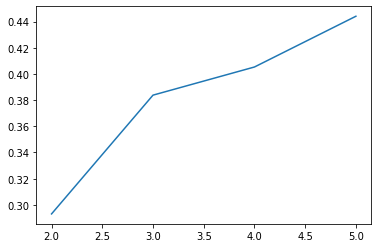

In [22]:
sns.lineplot(x=list(range(2,6)), y=distance)  # lower is better

In [20]:
from sklearn.metrics import silhouette_score
distance = []

for i in range(2,6):
  model = KMeans(n_clusters=i)
  model.fit(data)
  distance.append(silhouette_score(data, model.labels_))

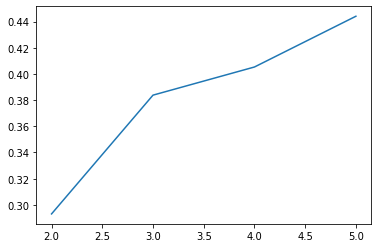

In [21]:
sns.lineplot(x=list(range(2,6)), y=distance) # higher is better